In [13]:
# shapley additive explanations

In [14]:
import shap
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [ ]:
data = load_breast_cancer() # load do modelo

In [ ]:
x, y = data['data'], data['target'] # data são os parametros e target são as classes (0, 1 ou 2)

In [17]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
data['target_names'] # classes

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) # separa entre teste e treinamento

In [ ]:
clf = LinearSVC() # linear support vector class
clf.fit(x_train, y_train) # fitting do modelo

LinearSVC()

In [ ]:
clf.score(x_test, y_test) # score do modelo

0.956140350877193

In [ ]:
clf.predict([x_test[0]])

array([1])

In [ ]:
explainer = shap.KernelExplainer(clf.predict, shap.kmeans(x_train, 10)) # explica o modelo

In [ ]:
shap_values = explainer.shap_values(x_test) # valores de shapley

100%|██████████| 114/114 [00:16<00:00,  6.91it/s]


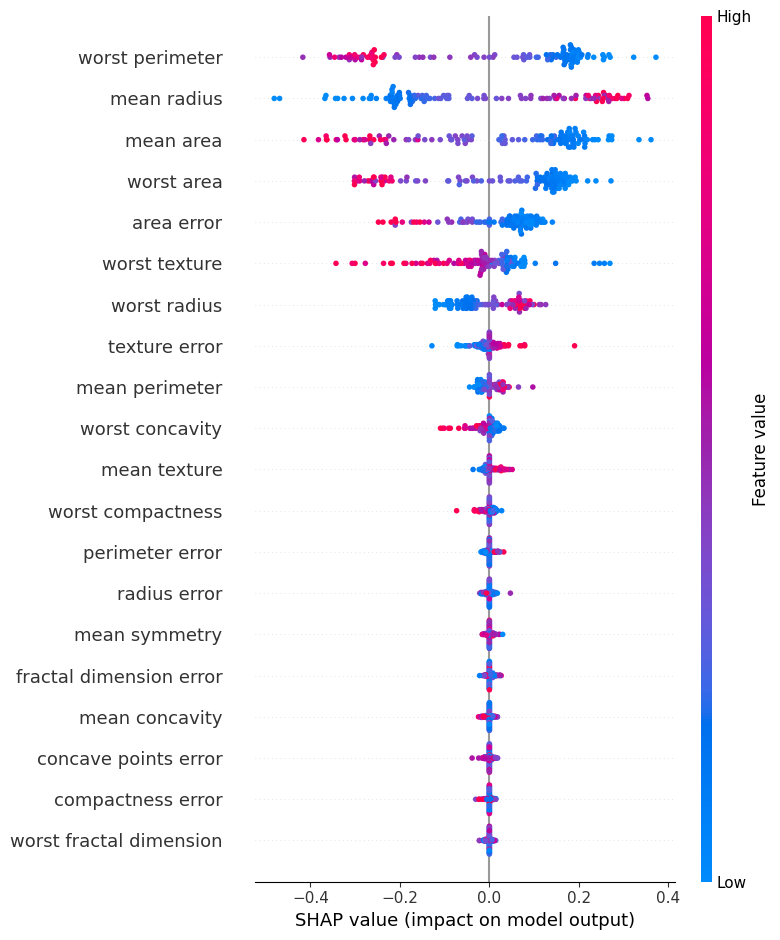

In [ ]:
shap.summary_plot(shap_values, x_test, feature_names=data['feature_names']) # plot dos valores de shapley

In [ ]:
shap.initjs() # precisa do js pra poder plotar
shap.force_plot(explainer.expected_value, shap_values[2], x_test[2], feature_names=data['feature_names'])

In [ ]:
mean_absolute_shap_values = np.abs(shap_values).mean(axis=0)  # média dos valores de shapley
mean_absolute_shap_values

array([0.19488586, 0.01244114, 0.01951225, 0.18007375, 0.00345216,
       0.00438033, 0.00502524, 0.00322994, 0.00517209, 0.00450824,
       0.00541561, 0.02139821, 0.0064728 , 0.08333685, 0.00443227,
       0.00465139, 0.00437925, 0.00489138, 0.00398938, 0.00505038,
       0.05912176, 0.07432757, 0.19632457, 0.15502195, 0.00429557,
       0.00902394, 0.01839735, 0.00452181, 0.00444295, 0.0045649 ])

In [36]:
feature_names = data['feature_names']
feature_importance = zip(feature_names, mean_absolute_shap_values)

In [ ]:
sorted_feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True) # ordena 

In [39]:
for feature, importance in sorted_feature_importance:
    print(f'{feature}: {importance}')

worst perimeter: 0.19632456514138097
mean radius: 0.19488585805563557
mean area: 0.18007374786955108
worst area: 0.1550219542879828
area error: 0.08333685051770856
worst texture: 0.0743275664771807
worst radius: 0.05912176257923609
texture error: 0.02139820624134555
mean perimeter: 0.019512250271259798
worst concavity: 0.018397350603136194
mean texture: 0.012441137215992775
worst compactness: 0.00902394398241169
perimeter error: 0.00647279704397755
radius error: 0.005415606391407809
mean symmetry: 0.005172092718814773
fractal dimension error: 0.005050376156971105
mean concavity: 0.0050252448091215925
concave points error: 0.0048913795232643715
compactness error: 0.004651392718120903
worst fractal dimension: 0.004564897771560324
worst concave points: 0.004521807988446451
mean fractal dimension: 0.004508240283403376
worst symmetry: 0.004442947112523165
smoothness error: 0.004432273862843122
mean compactness: 0.004380331420283091
concavity error: 0.004379250946495595
worst smoothness: 0.0